In [1]:
import tensorflow as tf 
import pickle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPool1D, Flatten, Activation, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from keras.layers.core import Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = pickle.load(open("/Users/sanda/Documents/ptb_xl/ptb_xl_pcl/all_x_no_stratified.pcl", 'rb'))
y = np.array(pickle.load(open("/Users/sanda/Documents/ptb_xl/ptb_xl_pcl/all_y_no_stratified.pcl", 'rb')))

In [3]:
print(X[:,:,1].shape)
print(len(y))
print(y[0])

(17116, 1000)
17116
N


In [4]:
for i in range(len(y)):
    if y[i]=="N":
        y[i] = 0
    else:
        y[i] = 1


X_train, X_test, y_train, y_test = train_test_split(X[:,:,1], y, random_state=1)
layer = tf.keras.layers.CategoryEncoding(num_tokens=2, output_mode="one_hot")
y_train = layer(y_train.astype(np.int32))
# y_test = layer(y_test.astype(np.int32))


In [5]:
#data generation
print(y_train[0])

tf.Tensor([1. 0.], shape=(2,), dtype=float32)


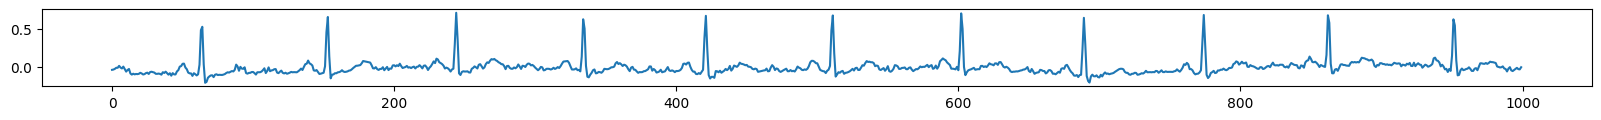

: 

: 

: 

: 

In [ ]:
plt.figure(figsize=(20,1))
plt.plot(X_train[0])
plt.show()

In [12]:
#define model
model = Sequential()
model.add(Conv1D(64, 5, input_shape=(1000,1)))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=3))

model.add(Conv1D(64, 3))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=3))

model.add(Dense(10))
model.add(Flatten())
model.add(Activation('relu'))
model.add(Dense(2))

model.add(Activation('softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])



In [ ]:
# model = Sequential()
# model.add(Dense(1))
# model.add(Activation('relu'))
# model.add(Dense(2))
# model.add(Flatten())
# model.add(Activation('softmax'))
# model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 996, 64)           384       
                                                                 
 activation_8 (Activation)   (None, 996, 64)           0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 332, 64)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 330, 64)           12352     
                                                                 
 activation_9 (Activation)   (None, 330, 64)           0         
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 110, 64)          0         
 1D)                                                  

In [14]:
epoch = 100
validation_step = 150
batch_size = 100
history = model.fit(X_train, y_train, validation_split=0.2, epochs=epoch, validation_steps=validation_step, verbose=1)

Epoch 1/100
321/321 [==============================] - 12s 34ms/step - loss: 0.6244 - accuracy: 0.6523 - val_loss: 0.5027 - val_accuracy: 0.7870
Epoch 2/100
321/321 [==============================] - 9s 28ms/step - loss: 0.4589 - accuracy: 0.7965
Epoch 3/100
321/321 [==============================] - 9s 27ms/step - loss: 0.4211 - accuracy: 0.8141
Epoch 4/100
321/321 [==============================] - 9s 27ms/step - loss: 0.4098 - accuracy: 0.8195
Epoch 5/100
321/321 [==============================] - 12s 36ms/step - loss: 0.3890 - accuracy: 0.8332
Epoch 6/100
321/321 [==============================] - 10s 31ms/step - loss: 0.3844 - accuracy: 0.8330
Epoch 7/100
321/321 [==============================] - 11s 36ms/step - loss: 0.3742 - accuracy: 0.8354
Epoch 8/100
321/321 [==============================] - 11s 33ms/step - loss: 0.3617 - accuracy: 0.8406
Epoch 9/100
321/321 [==============================] - 11s 35ms/step - loss: 0.3545 - accuracy: 0.8435
Epoch 10/100
321/321 [============

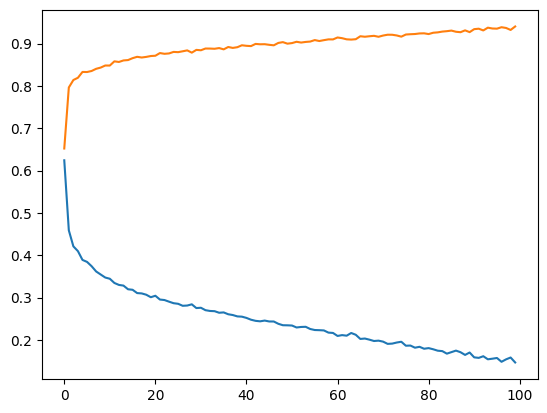

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.show()

The accuracy of the model is 0.7957466697826595


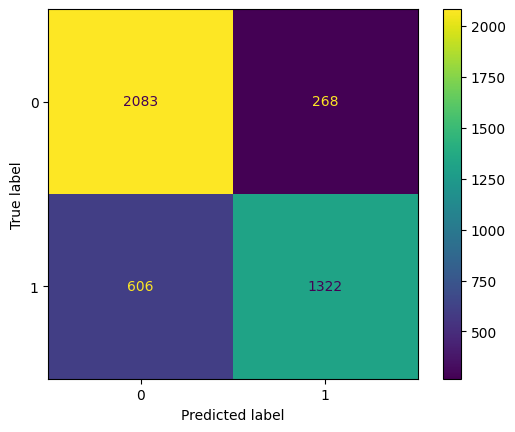

In [19]:
model.save("/Users/sanda/Documents/esp_dev_files/ecg_project_2/ptb_models_test/cnn_ptb_model_1.h5")
pred = model.predict(X_test)
pred_nohe = np.array([i.argmax() for i in pred])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test.astype(np.int), pred_nohe))
print(f'The accuracy of the model is {accuracy_score(y_test.astype(np.int), pred_nohe )}')
disp.plot()